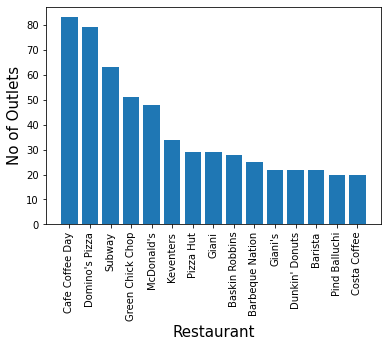

In [1]:
"""
Plot the bar graph top 15 restaurants have a maximum number of outlets.

Answer: Here I have considered only Indian Restaurants as it has been mentioned on the top of the Questions. Here I have
filtered out only Indian Restaurnats first by using boolean indexing. Once that's done I have made one dictionary in 
which I stored the outlet name and made it as key and frequency as the value. After iterating over all the names
I got my dictionary fully prepared for the data visualization but as the we need to print in descending order so I have
used one list of list named restaurant_names_counts which stores the name and the frequencey. After that I have sorted 
the list of list based on the frequency. Note: I have assumed no two rows with same outlet name and locality present
in the dataset. If that would have been considered then I would have need to filtered out those if already appeared. 
"""

# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
zomato_df =  pd.read_csv("zomato.csv",encoding='ISO-8859-1')
# Only Indian Restaurants
zomato_india_df = zomato_df[zomato_df['Country Code']==1]

restaurants_outlet_count = {}

def count_outlets(name):
    restaurants_outlet_count[name] = restaurants_outlet_count.get(name,0)+1
zomato_india_df['Restaurant Name'].apply(count_outlets)

restaurant_names_counts = [ [value,key] for key,value in restaurants_outlet_count.items()]
restaurant_names_counts.sort(reverse=True)
restaurants_name = [ i[1] for i in restaurant_names_counts][:15]
counts = [ i[0] for i in restaurant_names_counts][:15]
plt.bar(restaurants_name,counts)
plt.xticks(rotation=90)
plt.xlabel("Restaurant", size=15)
plt.ylabel("No of Outlets",size = 15)
plt.show()

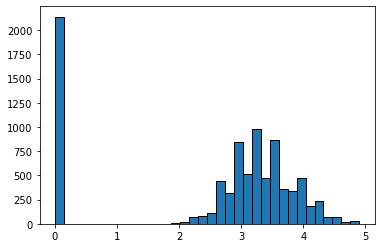

In [2]:
"""
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

Answer: As mentioned in the question I need to drop all the unrated restaurants so I have checked the Rating text column
if the text is not Not Rated then consider otherwise exclude and I am storing in a new data frame that is zomato_ratings.
After that I am picking values from only Aggregate rating column and storing it to ratings. Just to make sure there is no
nan values I have checked and store the values which don't have value as nan. after that I am ploting it graph and made the
bin to auto so that it decide automatically and made xticks to 0-5 as our rating lies between 0-5. From the graph we can
see that number of zero rating is drastically high as compare to other ratings. If we exclude 0 rating then we can notice
most of the restaurants got rating in between 3-4. 
"""

zomato_ratings = zomato_india_df[zomato_india_df['Rating text']!='Not Rated'].copy()
ratings = np.array(zomato_ratings['Aggregate rating'])
nan_ratings = np.isnan(ratings)
not_nan_ratings = ~ nan_ratings
ratings = ratings[not_nan_ratings]

xt = np.arange(6)
plt.hist(ratings,bins = "auto", edgecolor = "black")
plt.xticks(xt)
plt.show()

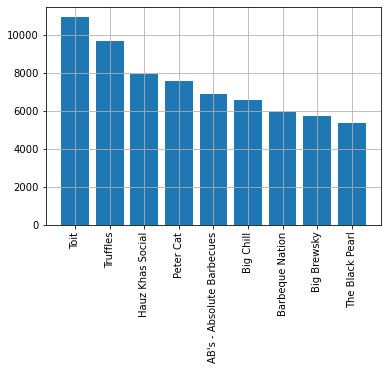

In [3]:
"""
Plot the bar graph top 10 restaurants in the data with the highest number of votes

Answer: To get the top 10 restaurants I have one dictionary to get the name of restaurant and number of votes but here one
case that can happen is that with same restaurant in different location get less votes and other one get ample number of votes.
As it hasn't been clearly mentioned in the question statement that do I need to consider only name or not, so I have considered them
as different. In the dictionary I am storing the name with its locality so it will be unique and will not repeat even 
after the name is same for two or more restaurants. Here name with locality works as the key and number of votes as the value. I have made
one column wherein I have combined name and locality & votes with ### & $$$. Reason for using two delimeter is that ###
will be used to split into two parts i.e name_locality and votes; later $$$ has been used to split into two parts where one part
is Name of the restaurant and the locality. I am storing the values after calling the function get_votes. Once I stored all
the values I have made one list where 0th column contains votes and 1st contains name of the restaurant. Now we have the
correct data now I simply sort them in descending order based on the votes and picked top 10 restaurants. From the graph
we can see :
1 Toit
2 Truffles
3 Hauz Khas Social
4 Peter Cat
5 AB's - Absolute Barbecues
6 Big Chill
7 Barbeque Nation
8 Big Brewsky
9 AB's - Absolute Barbecues
10 The Black Pearl

"""
name_with_address_and_votes = {}
def get_votes(votes_with_name_address):
    votes = int(votes_with_name_address.split("###")[0])
    name_with_address = votes_with_name_address.split("###")[1]
    name_with_address_and_votes[name_with_address] = name_with_address_and_votes.get(name_with_address,0) + votes
    return votes_with_name_address

zomato_ratings['Votes_with_City'] = zomato_ratings['Votes'].astype(str)+"###" + zomato_ratings['Restaurant Name']+"$$$"+zomato_ratings['Locality']
zomato_ratings['Votes_with_City'].apply(get_votes)

votes_names = [[value,key] for key,value in name_with_address_and_votes.items()]
votes_names.sort(reverse=True)

votes = [i[0] for i in votes_names][:10]
names = [i[1].split("$$$")[0] for i in votes_names][:10]
plt.bar(names,votes)
plt.grid()
plt.xticks(rotation=90)
plt.show()

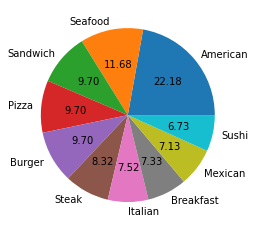

In [4]:
"""
Plot the pie graph of top 10 cuisines present in restaurants in the USA.

Answer: Here we need to filter out based on Country Code first and I have done and stored in zomato_usa_df. I have dropped
all nan values present in the cuisines column. I have maintained on dictionary which will help me to keep track of cuisines
count. One restaurants might be offering several cuisines. I have used one function inside which I am storing the count.
Before that I am making sure that I am not skipping any cuisines. Cuisines column consists of all the cuisines names together
so I have converted the type and then splited based on combination of space and comma; and updating the count which are
in the cuisines list. After I got all the count stored in the dictionary then I have made one list of list which store values
like 0th column will store the count and 1st column will store the cuisine name. After that I have sorted the list of list
based on counts. Now I just took only top 10 cuisines names and its values. Ploting them in the pie chart we can notice
Rank     Cuisine         %
1       American       22.18
2       Seafood        11.68
3       Sandwich       9.7
4       Pizza          9.7
5       Burger         9.7
6       Steak          8.32
7       Italian        7.52
8       Breakfast      7.33
9       Mexican        7.13
10      Sushi          6.73

"""

zomato_usa_df = zomato_df[zomato_df['Country Code']==216].copy()
zomato_usa_df['Cuisines'].dropna(inplace=True)
cuisines_count_in_usa = {}

def get_cuisines(cuisines):
    cuisines = str(cuisines)
    if cuisines!="":
        for cuisine in cuisines.split(', '):
            cuisines_count_in_usa[cuisine] = cuisines_count_in_usa.get(cuisine,0)+1
    return cuisines

zomato_usa_df['Cuisines'].apply(get_cuisines)
count_cuisines = [[value,key] for key,value in cuisines_count_in_usa.items()]
count_cuisines.sort(reverse=True)
counts = [i[0] for i in count_cuisines][:10]
cuisine_names = [i[1] for i in count_cuisines][:10]

# for i in range(len(cuisine_names)):
#     print(i+1,cuisine_names[i],round(100.00*counts[i]/sum(counts),2))
plt.pie(counts,labels=cuisine_names,autopct="%.2f")
plt.show()

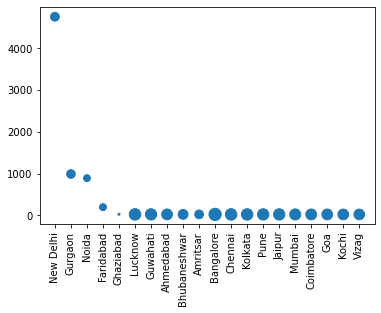

In [5]:
"""
Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant 
rating of the city in a bubble.

Answer: As we need to store the city weighted restaurant rating so I am making one city dictionary which will help me
get the city names and the weighted ratings. I have used the same formula which have been mentioned in one of the previous
question to find out the. But here I need to keep track of the count of restaurant present in the city so I am maintaining
that by updating the count by one whenever I encounter the same city name. So basically here key is city and value
is the list wherein 0th storing the summation of votes*ratings, 1st column storing the summation of votes and 2nd column
storing the count of restaurants present in that city. Once I got the dictionary filled with values I have calculated
the weighted rating and stored in a list named city_ratings with city name and total count. after that I have sorted
based on the count of restaurants present in the city. So number of cities can be huge so I have considered top 20 cities
in India. Delhi topped among the of cities. After that I have plotted them in the graph and provided the size of the bubble
based on the weighted rating of the city. 


NOTE: I have substracted 3 from each value if any value gets negative I have made it positive. As they are very close 
to each other so I have multiplied with 100 to get the proper visualization. 
Here is the list:
SL    City       Rating
1 	 New Delhi 	 3.77
2 	 Gurgaon 	 3.74
3 	 Noida 	     3.47
4 	 Faridabad 	 3.48
5 	 Ghaziabad 	 3.04
6 	 Lucknow 	 4.32
7 	 Guwahati 	 4.27
8 	 Ahmedabad 	 4.16
9 	 Bhubaneshwar3.97
10 	 Amritsar 	 3.76
11 	 Bangalore 	 4.5
12 	 Chennai 	 4.32
13 	 Kolkata 	 4.3
14 	 Pune 	     4.28
15 	 Jaipur 	 4.28
16 	 Mumbai 	 4.22
17 	 Coimbatore  4.17
18 	 Goa 	     4.16
19 	 Kochi 	     4.14
20 	 Vizag 	     4.13

"""


city_dict = {}


cities = np.array(zomato_india_df['City'])
ratings = np.array(zomato_india_df['Aggregate rating'])
votes = np.array(zomato_india_df['Votes'])

for i in range(len(cities)):
    if votes[i]!=0:
        if cities[i] not in city_dict:
            city_dict[cities[i]] = [votes[i]*ratings[i],votes[i],1]
        else:
            city_dict[cities[i]][0] += votes[i]*ratings[i]
            city_dict[cities[i]][1] += votes[i]
            city_dict[cities[i]][2] +=1


        

city_ratings = []
for key,value in city_dict.items():
    city = key
    weighted_rating = round(value[0]/value[1],2)
    city_ratings.append([value[2],weighted_rating,key])
    
city_ratings.sort(reverse=True)
cities = np.array([ i[2] for i in city_ratings][0:20])
ratings = np.array([ i[1] for i in city_ratings][0:20])
ratings = ratings-3
counts = np.array([ i[0] for i in city_ratings][0:20])
ratings[ratings[0]<0] = -ratings[0]

# for i in range(len(cities)):
#     print(i+1,"\t",cities[i],"\t",ratings[i]+3)
plt.scatter(cities,counts,s=ratings*100)
plt.xticks(rotation=90)
plt.show()